In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [3]:
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [4]:
model = LogisticRegression(solver="liblinear",random_state=0)
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
model.classes_

array([0, 1])

In [6]:
print(model.intercept_,model.coef_)

[-1.04608067] [[0.51491375]]


In [7]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [8]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model.score(x,y)

0.9

In [10]:
confusion_matrix(y,model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

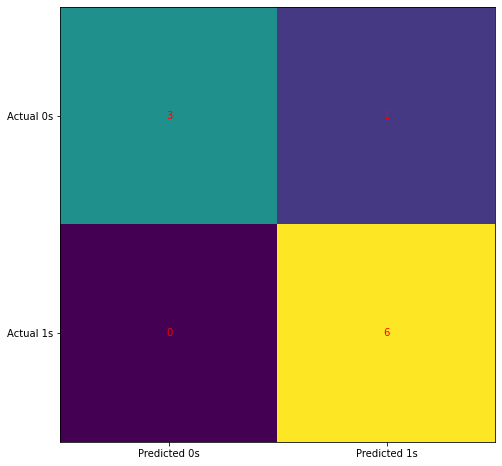

In [11]:
cm = confusion_matrix(y,model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted 0s","Predicted 1s"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual 0s","Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha="center",va="center",color="red")
plt.show()

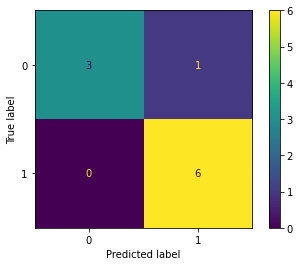

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x,y)

In [13]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# Improving the Model

In [14]:
model = LogisticRegression(solver="liblinear",C=10.0,random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [15]:
print(model.intercept_,model.coef_)

[-3.51335372] [[1.12066084]]


In [16]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [17]:
model.score(x,y)

1.0

In [18]:
confusion_matrix(y,model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [19]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Handwriting Recognition

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
x,y = load_digits(return_X_y=True)
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [24]:
x_train[0]

array([ 0.        , -0.33790435, -1.09141592, -0.64913206,  0.73480922,
       -0.6782652 , -0.40764783, -0.12238102, -0.05576317, -0.62606288,
       -0.99058772,  0.99749054,  0.13213489, -1.19579353, -0.51556231,
       -0.12605859, -0.03733267, -0.72296123,  0.55610538,  1.38118964,
       -0.98465664, -1.26284019, -0.55465252, -0.11565628, -0.02638899,
       -0.15208278,  1.10759523,  0.37163491, -1.60830723, -1.28974179,
       -0.63555933, -0.04573894,  0.        , -0.10276083,  1.32734049,
        0.31000002, -1.05452978, -0.80512633, -0.83498919,  0.        ,
       -0.05806465,  0.13008703,  1.23225418,  1.35913603,  1.32341669,
        1.01539823,  1.51779287,  3.19368333, -0.03963009, -0.40398151,
        0.25100815,  1.22276113, -0.47996928, -0.96182318,  2.3466476 ,
        6.15487177, -0.02638899, -0.30140625, -1.0865776 , -1.14418634,
        0.65337948,  1.58325794,  3.53125595,  3.30213343])

In [25]:
model = LogisticRegression(solver="liblinear",C=0.05,multi_class="ovr")
model.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', solver='liblinear')

In [26]:
scaler.transform(x_test)

array([[ 0.        , -0.33790435,  1.20793253, ...,  1.07172193,
         3.53125595,  4.46516425],
       [ 0.        ,  0.74354009,  2.04405924, ..., -0.97442211,
        -0.49765616, -0.18695903],
       [ 0.        ,  1.82498453,  1.62599589, ...,  1.58325794,
         3.53125595,  1.5575872 ],
       ...,
       [ 0.        ,  0.74354009,  0.78986918, ..., -0.4628861 ,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435, -1.09141592, ...,  1.41274594,
         0.00595786, -0.18695903],
       [ 0.        , -0.33790435, -1.09141592, ...,  0.90120993,
        -0.49765616, -0.18695903]])

In [27]:
y_pred = model.predict(x_test)

In [28]:
model.score(x_train,y_train)

0.964509394572025

In [29]:
model.score(x_test,y_test)

0.8805555555555555

In [30]:
confusion_matrix(y_test,y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  3, 28,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  0, 23,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  3,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  4,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 10, 30]], dtype=int64)

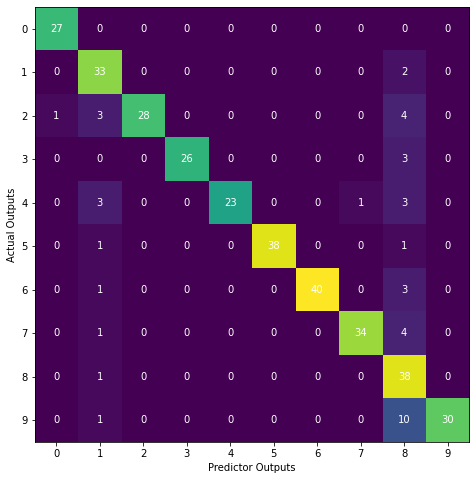

In [31]:
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)

ax.set_xlabel("Predictor Outputs",color="black")
ax.set_ylabel("Actual Outputs",color="black")

ax.set_ylim(9.5,-0.5)

ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
for i in range(10):
    for j in range(10):
        ax.text(j,i,cm[i,j],ha="center",va="center",color="white")
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.75      0.94      0.84        35
           2       1.00      0.78      0.88        36
           3       1.00      0.90      0.95        29
           4       1.00      0.77      0.87        30
           5       1.00      0.95      0.97        40
           6       1.00      0.91      0.95        44
           7       0.97      0.87      0.92        39
           8       0.56      0.97      0.71        39
           9       1.00      0.73      0.85        41

    accuracy                           0.88       360
   macro avg       0.92      0.88      0.89       360
weighted avg       0.92      0.88      0.89       360



# KNN

In [33]:
weather = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]

temp = ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"]

play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]

In [34]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [35]:
temp_encoded = le.fit_transform(temp)

label = le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [36]:
features = list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [37]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features,label)

predicted = model.predict([[0,2]])

predicted

array([1], dtype=int64)

# Multiple Labels KNN

In [38]:
from sklearn import datasets

wine = datasets.load_wine()

In [39]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [40]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [41]:
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [42]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
wine.data.shape

(178, 13)

In [44]:
wine.target.shape

(178,)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [47]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.6481481481481481

In [48]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [49]:
metrics.accuracy_score(y_test,y_pred)

0.7037037037037037

In [50]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

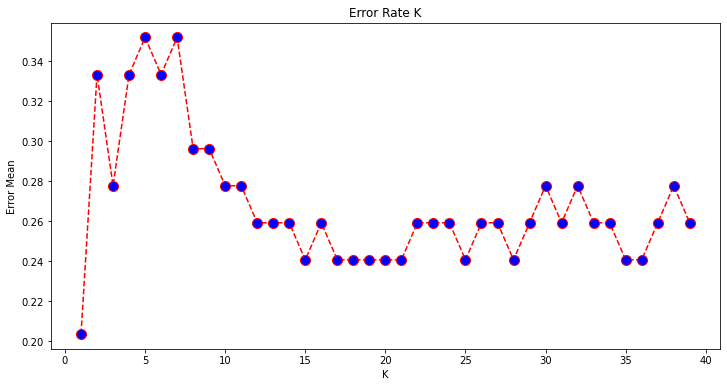

In [51]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color="red",linestyle="dashed",marker="o",markerfacecolor="blue",markersize=10)
plt.title("Error Rate K")
plt.xlabel("K")
plt.ylabel("Error Mean")
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [53]:
metrics.accuracy_score(y_test,y_pred)

0.7407407407407407